# BERT
![imge0](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkZl9A%2Fbtrs5ypcO5M%2Fp49zqNvmpcH4jS4i3TRhn1%2Fimg.png)

- **Bidirectional Encoder Representation from Transformer**
- 2018년도 구글이 선택한 Transformer 인코더 아키텍쳐 기반의 **자연어 처리 사전 훈련** 모델
- 위키피디아(25억 단어)의 Books Corpus(8억 단어) 레이블이 없는 텍스트를 데이터로 사전 훈련 실시
- **Fine Tuning** : 이미 설계된 모델이 다른 작업에 대해 파라미터 재 조정을 위한 추가 훈련 과정

- BERT의 구성
  - Word Embedding : BERT 단어를 Embadding 하는 3가지 파트가 존재
    - Word Piece Embedding : 단어를 벡터형태로 변환하는 Embedding
    - Position Embedding : 단어의 위치 정보를 계산하는 Embedding
    - Segment Embedding : 각 문장을 구분하는 정보를 갖는 Embedding
  - Bidrictional Transformer 구조 (양방향 변환 구조) : BERT는 문장의 앞/뒤 문맥을 동시에 고려하여 각 단어의 의미를 이해하는 (Mask) 구조
- BERT 구조의 활용
  - Masked Language Model (MLM) : BERT의 핵심적인 훈련 구조로, 텍스트에서 무작위로 단어를 가린 (Masking) 모델이 그 빈자리를 예측하도록 학습
  - Next Sentence Prediction (NSP) : BERT가 두 문장이 주어졌을 때, 두 번째 문장이 첫번째 문장의 논리적인 후속 문장인지를 예측하도록 학습

## NLP Pre Training

- 대규모의 언어 데이터를 이용하여 미리 만들어진 모델 (Pre Training Model)을 이용해, 다른 모델이나 어플리케이션에 적용하는 방식 (Transfer Lerning)
  1. Pre Training Word Embedding : 방대한 자연어 데이터로 Word 2 Vector와 같은 Embedding 알고리즘으로 사전에 학습된 임베딩 벡터를 가져와 사용하는 방버
  2. Pre Training Language Modeling : 모델이 주어진 문장을 바탕으로 다음 문장을 예측해나가며 학습하는 사전 학습 방식 (GPT, Generative Pre-Training Transformer)
  3. Masked Language Modeling : 문장 내 비어있는 텍스트를 채우도록 훈련하는 방식

# MLM

- 절차 :
  1. 원본 문장 호출 : '나는 고양이와 강아지 중 어떤걸 키울지 고민이야.'
  2. 마스킹 실시 : 나는[Mask]와 [Mask] 중 어떤걸 키울지 고민이야.'
  3. Transfomer의 Encoder구조를 이용하여, Mask된 부분의 단어를 학습
  4. 특정 문장 내 Mask된 부분을 예측
  5. BERT 사전 훈련을 위해 인공 신경망의 입력으로 들어가는 입력 Text의 15% Masking

In [1]:
! pip install transformers
! pip install tf-keras
! pip install torch

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ----------------------------------- -- 41.0/43.8 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 714.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.1 MB 30.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.1 MB 26.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.1 MB 22.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.1 MB 22.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.1 MB 22.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.0/9.1 MB 12.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/9.1 MB 14.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.1 MB 13.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.1 MB 12.5 MB/s eta 0:00:01
   ---

In [2]:
# TFBertForMaskedLM : Tensorflow에서 사용가능한 BERT MLM
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer

- klue/bert-base (klue / Korean Language Understanding Evaluation)
- 한국어 데이터셋을 이용해 사전 훈련된 BERT 모델

In [9]:
# 사전 훈련된 모델을 가져옴
model = TFBertForMaskedLM.from_pretrained('klue/bert-base', from_pt = True)
# from_pt = True : 해당 모델이 파이토치에서 학습이 되었으나, 텐서플로우에서 사용되도록

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMaskedLM: ['bert.embeddings.position_ids', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing TFBertForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [5]:
tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
# 모델의 훈련시 사용되었던 토크나이징 규칙과 단어의 사전을 불러옴

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [6]:
# 토크나이저를 사용하여 해당 문장을 정수로 인코딩
inputs = tokenizer('데이터 분석 프로젝트는 정말 [MASK]다.' , return_tensors='tf')

In [7]:
from transformers import FillMaskPipeline

In [11]:
# 비어있는 Mask 토큰을 예측
pipe1 = FillMaskPipeline(model=model, tokenizer = tokenizer)
pipe1('데이터 분석 프로젝트는 정말 [MASK]다.')

[{'score': 0.15516649186611176,
  'token': 11980,
  'token_str': '멋지',
  'sequence': '데이터 분석 프로젝트는 정말 멋지 다.'},
 {'score': 0.07767242193222046,
  'token': 3841,
  'token_str': '최고',
  'sequence': '데이터 분석 프로젝트는 정말 최고 다.'},
 {'score': 0.05378102883696556,
  'token': 6001,
  'token_str': '재미있',
  'sequence': '데이터 분석 프로젝트는 정말 재미있 다.'},
 {'score': 0.036676276475191116,
  'token': 4258,
  'token_str': '어렵',
  'sequence': '데이터 분석 프로젝트는 정말 어렵 다.'},
 {'score': 0.03222637251019478,
  'token': 1504,
  'token_str': '이',
  'sequence': '데이터 분석 프로젝트는 정말 이 다.'}]

# NSP

- 두 개의 문장을 준 후에 이 문장이 서로 이어지는 문장인지 아닌지를 맞추는 방식으로 학습하는 기법
- BERT는 50:50 비율로 실제는 이어지는 두개 문장을 붙여 학습 / 나머지는 Random한 문장을 붙여 학습
- 각 문장 간 구분을 [SEP]라는 태그를 이용해 구분
- 두 문장이 이어지는 지 아닌지를 [CLS]토큰으로 출력하여 확인
- BERT는 MLM과 NSP 동시 진행 학습을 수행

In [12]:
from transformers import TFBertForNextSentencePrediction

In [14]:
model_nsp = TFBertForNextSentencePrediction.from_pretrained('klue/bert-base', from_pt = True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForNextSentencePrediction: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForNextSentencePrediction from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForNextSentencePrediction from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForNextSentencePrediction were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForNextSentencePrediction for predictions without further training.


In [15]:
from keras.layers import Softmax
import tensorflow as tf

In [25]:
# 두 문장의 일치 여부 판별 함수
def nsp_bert(first_sent, second_sont) :
    # 토크나이징
    encoding = tokenizer(first_sent, second_sont, return_tensors='tf')
    # 모델을 실행
    outputs = model_nsp(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])
    
    # 최종 예측 (1 또는 0 예측)
    softmax = Softmax()
    prob_output = softmax(outputs.logits)
    
    return tf.math.argmax(prob_output, axis=1).numpy()

In [26]:
# 예제문장
sent1 = "오늘 프로젝트는 반드시 6시전에 끝내겠어!"
sent2 = "하지만 해야될게 너무 많네 ㅠㅠ"

In [27]:
nsp_bert(sent1, sent2)

array([0], dtype=int64)

In [28]:
# 예제문장
sent1 = "아 월요일 너무 힘들다"
snet2 = "주말은 언제오냐?ㅠㅠ"
nsp_bert(sent1, sent2)

array([0], dtype=int64)

# BERT를 이용한 Chat Bot 구현

In [29]:
!pip install sentence-transformers

   ---------------------------------------- 0.0/227.1 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/227.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 227.1/227.1 kB 4.7 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import norm
from sentence_transformers import SentenceTransformer

In [31]:
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\39_Data.csv')
df1.head(3)

,Unnamed: 0,Q,A,label
0,0,12시 땡!,하루가 또 가네요.,0
1,1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0


In [33]:
# Hugging Face에서 문장을 Embadding 하는 모델 호출 / BERT
model_url = 'sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens'
model = SentenceTransformer(model_url)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

C:\ProgramData\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [34]:
df1['Q'][0]

'12시 땡!'

In [35]:
model.encode(df1['Q'][0])

array([ 2.01795861e-01, -3.44381519e-02,  1.53957236e+00,  1.06974738e-02,
        3.79792273e-01,  1.42492861e-01,  1.82864204e-01,  5.58312476e-01,
       -3.94889295e-01, -1.17657557e-01, -2.32988909e-01,  3.39581072e-02,
       -2.47104198e-01,  3.14535707e-01,  5.60950339e-01, -1.05517350e-01,
       -2.92884797e-01, -2.04060271e-01,  3.35199200e-02, -3.21389586e-01,
       -1.86384097e-01,  8.55993256e-02,  1.51072368e-01, -3.84577215e-01,
       -2.92813510e-01, -4.39995229e-01,  4.83394176e-01, -9.67642784e-01,
       -1.51495850e-02,  3.77274188e-03,  2.49316186e-01, -6.04051165e-02,
        2.29004860e-01, -2.45081428e-02, -4.22660373e-02, -7.88766891e-02,
       -5.18548608e-01, -2.25840490e-02, -1.13830075e-01, -4.75926191e-01,
        8.06325734e-01, -3.97932343e-02,  3.83716822e-01,  2.23248646e-01,
       -7.62536004e-02, -7.43275881e-02,  3.57227623e-02,  2.59037048e-01,
       -3.44938189e-01, -5.93228459e-01, -8.21068406e-01, -4.05041933e-01,
        1.16658531e-01,  

In [36]:
from tqdm.auto import tqdm

In [37]:
tqdm.pandas() # pandas 라이브러리 내 apply 함수에 진행상황을 확인

In [38]:
# 데이터의 모든 질문에서 문장 임베딩 값을 계산
df1['embedding'] = df1['Q'].progress_apply(lambda x : model.encode(x))

  0%|          | 0/11823 [00:00<?, ?it/s]

In [39]:
# 코사인 유사도를 이용해 질문과 답변을 매칭
def cos_sim(A,B) :
    return dot(A,B) / (norm(A) * norm(B))

In [41]:
# 새로운 질문이 들어왔을 때, 해당 질문에 대한 답변 중 
# 가장 코사인 유사도가 높은 답변을 출력
def return_answer(question) :
    embedding = model.encode(question)
    df1['score'] = df1['embedding'].apply(lambda x : cos_sim(x, embedding))
    return df1.loc[df1['score'].idxmax()]['A']

In [42]:
return_answer('배고프당')

'얼른 맛난 음식 드세요.'

In [43]:
# KeyBERT : BERT를 활용한 토픽 모델링
!pip install keybert

In [44]:
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

In [45]:
model = SentenceTransformer('xlm-roberta-base')

No sentence-transformers model found with name xlm-roberta-base. Creating a new one with mean pooling.
C:\ProgramData\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [46]:
model_topic = KeyBERT(model=model)

In [49]:
with open(r'C:\Users\UserK\Desktop\Ranee\data\ML\data3.txt', encoding = 'utf-8') as file :
    text1 = file.read()

In [54]:
text_sent1 = [x for x in text1.split('\n')]

In [55]:
model_topic.extract_keywords(text_sent1, keyphrase_ngram_range=(0,1), top_n=4)

[('정책결정기관에', 0.985),
 ('국립정보기관이나', 0.9841),
 ('공개출처정보들을', 0.9832),
 ('오픈소스센터를', 0.9818)]

# GPT (Generative Pre Trainined Transformer)

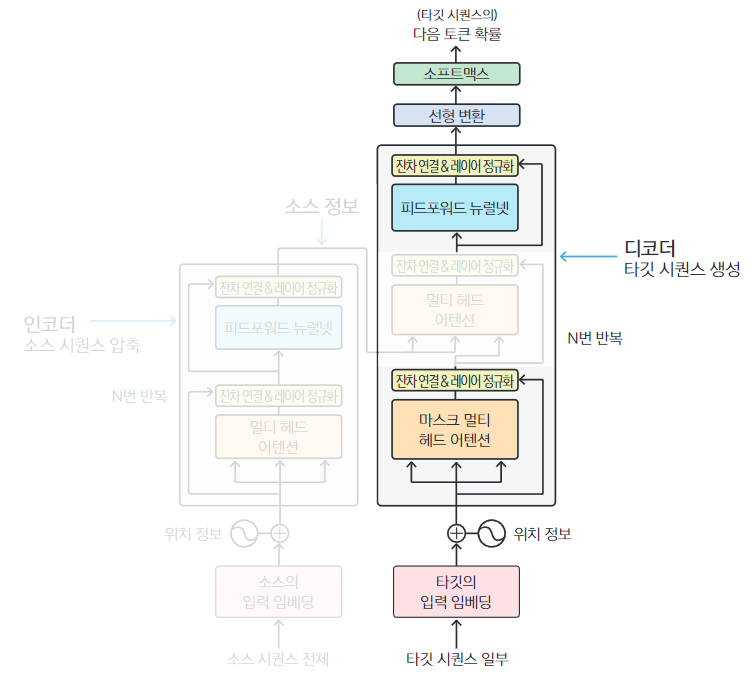

- Transformer의 Decoder 구조를 사용하는 자연어 처리 모델
- GPT는 자기 회귀(Self-Regressive) 방식으로 작동하며, 이전 토큰을 기반으로 다음 토믄을 예측
- 문장을 단방향으로만 처리 / 자연스러운 Text를 생성하는데 초점이 맞춰져 있음

In [56]:
from transformers import GPT2LMHeadModel
from transformers import PreTrainedTokenizerFast

In [57]:
def load_model() :
    model_url = 'skt/kogpt2-base-v2'
    model = GPT2LMHeadModel.from_pretrained(model_url)
    tokenizer = PreTrainedTokenizerFast.from_pretrained(model_url)
    return model, tokenizer

In [58]:
model, tokenizer = load_model()

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [61]:
def generate_text(start_sent, model, tokenizer) :
    # 입력 텍스트를 토크나이징 처리 후, 모델에 제공
    inputs = tokenizer.encode(start_sent, return_tensors='pt')
    # 텍스트를 이어 생성
    outputs = model.generate(inputs, max_length = 50, num_return_sequences=1)
    # 생성된 문장 벡터를 문자로 변환
    result = tokenizer.decode(outputs[0], skip_special_tokens = True)
    return result

In [62]:
generate_text('오늘 배고픈데 나는 점심으로', model, tokenizer)

'오늘 배고픈데 나는 점심으로 먹었어. '

In [63]:
generate_text('오늘 팀프로젝트는', model, tokenizer)

'오늘 팀프로젝트는 지난해 12월 말 기준 총 3조5000억원의 매출을 달성했다.\n이 중 해외 매출은 1조5000억원으로 전체 매출의 약 30%를 차지했다.\n이번 프로젝트는 지난해 12월 말 기준 총 매출의'

# GPT Hyper-Parameter Tuning

- Greedy 기법 : 각 시점에서 가장 높은 확률을 가진 토큰을 선택하는 기법
- Beam 기법 : 한 시점에서 여러개의 가장 가능성 있는 후보를 유지하며 단어 토큰을 선택
- Repetition Penalty : 반복적인 단어나 문장을 피하기 위해 패널티를 적용
  - 모델이 출력하는 결과의 다양성 보장 -> 좀 더 자연스러운 문장이 생성

In [75]:
# GPT HyperParameter Tuning
def generate_text(start_sent, model, tokenizer) :
    inputs = tokenizer.encode(start_sent, return_tensors='pt')
    # Hyperparameter Tuning
    outputs = model.generate(inputs, 
                             max_length = 30, # 문장 길이 축소 
                             do_sample = False, # Greedy 기법 적용 
                             num_beams=3, # Beam 기법을 이용해, 3개의 단어 후보군 중 하나를 선택 
                             no_repeat_ngram_size =3, # 특정 토큰이 3회 이상 반복해 나올 경우, 3번째 토큰을 0으로 변경 
                             repetition_penalty = 1.5,
                             num_return_sequences = 1)
    result = tokenizer.decode(outputs[0], skip_special_tokens = True)
    return result

In [76]:
generate_text('오늘은 배고픈덴 점심시간에,', model, tokenizer)

'오늘은 배고픈덴 점심시간에, 저녁식사시간에는 짬뽕을 먹었습니다.\n그런데 이게 웬일입'